# Load training data

In [1]:
import polars as pl

host_df = pl.read_csv('../data/from_host/train.csv')
display(host_df.describe())
host_df.head()

statistic,id,SMILES,Tg,FFV,Tc,Density,Rg
str,f64,str,f64,f64,f64,f64,f64
"""count""",7973.0,"""7973""",511.0,7030.0,737.0,613.0,614.0
"""null_count""",0.0,"""0""",7462.0,943.0,7236.0,7360.0,7359.0
"""mean""",1.0800e9,null,96.452314,0.367212,0.256334,0.985484,16.419787
"""std""",6.2182e8,null,111.228279,0.029609,0.089538,0.146189,4.60864
"""min""",87817.0,"""*/C(=C(/*)c1ccccc1)c1ccccc1""",-148.029738,0.2269924,0.0465,0.748691,9.7283551
"""25%""",5.37664135e8,null,14.086863,0.349546,0.186,0.890243,12.531907
"""50%""",1.0791e9,null,74.040183,0.36427,0.236,0.948193,15.064002
"""75%""",1.6217e9,null,162.18557,0.380796,0.3305,1.062096,20.429383
"""max""",2.1474e9,"""*c1sc(*)c2c1OCC(CCCCCCCCCCCCCC…",472.25,0.777097,0.524,1.840999,34.672906


id,SMILES,Tg,FFV,Tc,Density,Rg
i64,str,f64,f64,f64,f64,f64
87817,"""*CC(*)c1ccccc1C(=O)OCCCCCC""",null,0.374645,0.205667,null,null
106919,"""*Nc1ccc([C@H](CCC)c2ccc(C3(c4c…",null,0.3704102,null,null,null
388772,"""*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(…",null,0.37886,null,null,null
519416,"""*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c…",null,0.3873239,null,null,null
539187,"""*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCO…",null,0.35547,null,null,null


In [ ]:
poly_one_df = pl.read_parquet(['../data/polyOne/polyOne_ad.parquet', '../data/polyOne/polyOne_bc.parquet']).sample(n=8*len(host_df)) # 0.0288, 0.0323, 0.0257
display(poly_one_df.describe())
poly_one_df.head()

statistic,smiles,Egc,Egb,Eib,CED,Ei,Eea,nc,ne,epse_6.0,epsc,epse_3.0,epse_1.78,epse_15.0,epse_4.0,epse_5.0,epse_2.0,epse_9.0,epse_7.0,TSb,TSy,epsb,YM,permCH4,permCO2,permH2,permO2,permN2,permHe,Eat,rho,LOI,Xc,Xe,Cp,Td,Tg,Tm
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""63784""",63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0,63784.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,3.427728,3.066735,3.342586,132.343277,5.817612,2.254946,1.945749,1.630516,3.40889,4.445036,3.672541,3.928421,2.644577,3.565768,3.48795,3.866581,3.126804,3.320908,83.431145,67.495201,14.855095,2015.39624,1.727476,25.351694,41.617928,5.958321,1.561681,34.955944,-6.030601,1.296544,32.461632,41.318913,38.239384,1.278323,712.916931,498.70459,592.108398
"""std""",null,0.540557,0.575264,0.287058,19.536013,0.297158,0.391786,0.101496,0.055197,0.380676,0.451792,0.455808,0.505485,0.172178,0.427495,0.403524,0.494598,0.308729,0.357182,17.238815,11.817049,13.197007,358.427521,4.48992,67.780029,69.477226,12.8759,3.503287,48.48737,0.146244,0.100488,6.57162,11.471463,9.255734,0.113047,58.564133,61.594086,61.425503
"""min""","""[*]C#CC#CCN(c1ccccc1)c1ccc2c(c…",0.462167,0.822184,2.226995,34.100498,3.839795,0.625124,1.563943,1.346997,2.174279,2.94927,2.181213,2.181062,2.119388,2.180388,2.178009,2.180754,2.157406,2.168841,9.84872,6.556947,1.005818,195.188675,-0.318303,0.033004,0.440675,-0.119201,-0.231159,0.639427,-6.537001,0.905176,15.786127,6.420502,7.708358,0.922787,465.049957,194.929489,303.289185
"""25%""",null,3.058112,2.658014,3.140333,120.308907,5.636275,2.049025,1.879403,1.596804,3.154848,4.139275,3.363557,3.584834,2.531172,3.278606,3.217741,3.529103,2.914692,3.0813,72.698578,60.746014,7.866436,1822.353638,0.298715,4.883823,13.248018,1.288783,0.305291,12.785625,-6.126181,1.236518,28.401861,33.568062,32.477642,1.207969,671.225586,462.609497,554.445679
"""50%""",null,3.404495,3.014015,3.356736,129.706573,5.816462,2.265551,1.942335,1.632668,3.386118,4.419598,3.642849,3.902783,2.631835,3.535671,3.460049,3.840262,3.11202,3.304225,85.297287,68.101532,11.584024,2035.247803,0.697167,10.342433,23.529333,2.757939,0.677141,21.686979,-6.053067,1.287339,31.435692,40.16782,37.079227,1.257593,716.760132,508.678162,598.178772
"""75%""",null,3.750711,3.413468,3.533578,141.485199,5.996831,2.482922,2.009772,1.66616,3.637251,4.724211,3.951602,4.238575,2.742395,3.825755,3.73121,4.170448,3.318002,3.534486,95.62973,75.159035,17.346693,2237.954346,1.668211,23.660656,45.049679,6.072867,1.580107,39.39946,-5.963258,1.346794,35.26281,47.699932,42.644218,1.325364,757.103088,543.270996,635.354004
"""max""","""[*]n1nccc1-c1ccc2c(c1)c1ccccc1…",7.35955,7.651965,5.070818,253.388611,8.36078,4.18997,2.542808,1.934094,5.559963,7.188665,6.162675,6.715418,3.863602,5.921249,5.754436,6.584281,4.957166,5.373966,160.75351,112.742409,273.974213,3544.485352,228.545959,3354.832031,2651.307129,529.259521,140.811966,1674.443115,-5.260795,1.857166,70.942856,96.862228,88.07074,1.897641,1052.219849,691.142456,812.319275


smiles,Egc,Egb,Eib,CED,Ei,Eea,nc,ne,epse_6.0,epsc,epse_3.0,epse_1.78,epse_15.0,epse_4.0,epse_5.0,epse_2.0,epse_9.0,epse_7.0,TSb,TSy,epsb,YM,permCH4,permCO2,permH2,permO2,permN2,permHe,Eat,rho,LOI,Xc,Xe,Cp,Td,Tg,Tm
str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""[*]C(=O)c1ccc(C(=O)N(C)C(=O)CC…",4.5986,4.006011,3.474079,117.707275,6.779108,1.942967,1.879628,1.607212,3.718831,4.446993,4.095495,4.29555,2.614483,3.973819,3.850616,4.250669,3.29881,3.571824,72.606079,61.503429,32.377998,1867.010376,0.645507,4.879552,12.31781,1.469414,0.563397,13.470089,-6.114029,1.277439,27.321226,35.779533,31.88673,1.182166,613.237488,491.580841,554.619507
"""[*]OC1CC(C)(C)CC(C)(CC2N(CCCC)…",3.961177,4.021499,3.752093,84.048073,5.297412,1.03378,1.666463,1.460192,2.86403,3.379715,3.011242,3.040231,2.37349,2.97328,2.920584,3.039898,2.652018,2.795055,51.99255,47.445927,9.825008,1409.934937,8.291538,75.259056,76.133118,17.564238,5.821793,53.713375,-6.325039,1.021451,18.624704,10.47535,13.131899,1.188268,632.887878,397.06778,479.433197
"""[*]CNc1ccc(C=NN=Cc2ccc(Cc3ccc4…",3.221952,2.789144,3.330721,134.077759,5.599877,2.313876,1.962284,1.6459,3.470788,4.401649,3.693029,3.947017,2.72738,3.595478,3.540968,3.8841,3.216118,3.396809,90.445908,76.097504,8.725266,1851.566895,0.636925,9.630866,20.566116,2.561934,0.591379,17.844671,-6.155777,1.251683,29.017263,32.18858,31.260023,1.193318,723.865479,459.817047,574.835022
"""[*]c1ccc(Nc2ccccc2-c2ccc(S(=O)…",3.53163,3.174931,3.492802,140.65152,5.935304,2.573449,2.114295,1.718745,3.864086,5.256824,4.245496,4.632237,2.853558,4.090538,3.970388,4.5376,3.505974,3.754051,78.768799,65.889137,12.266361,2374.464111,1.043939,18.440525,32.645844,3.967926,0.983276,30.936161,-6.172076,1.282553,32.752789,36.583015,34.881805,1.200065,685.747803,530.922913,587.164185
"""[*]N1C(=O)c2cccc(NC(=O)c3ccccc…",3.757116,3.267619,3.389728,142.871109,6.092232,2.390715,1.989617,1.657371,3.563672,4.610857,3.80148,4.090994,2.711132,3.698674,3.631605,4.013677,3.285837,3.491245,90.177765,76.317825,12.757894,2194.225586,0.216327,4.630924,13.44123,1.002085,0.219143,14.76348,-6.054605,1.227253,26.043201,32.633953,33.089848,1.217522,694.663574,504.143921,561.88269


# Preprocess data

In [135]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, MACCSkeys, rdFingerprintGenerator
from tqdm import tqdm

fingerprint_generator_1 = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
fingerprint_generator_2 = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)

all_smiles = host_df['SMILES'].to_list() + poly_one_df['smiles'].to_list()
# all_fingerprints = np.array([
#     np.concat([
#         fingerprint_generator_1.GetFingerprint(Chem.MolFromSmiles(smiles)),
#         fingerprint_generator_2.GetFingerprint(Chem.MolFromSmiles(smiles)),
#         MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smiles))
#     ])
#     for smiles in tqdm(all_smiles)
# ])

all_fingerprints = []
for smiles in tqdm(all_smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol_fingerprints = np.concat([
        fingerprint_generator_1.GetFingerprint(mol),
        fingerprint_generator_2.GetFingerprint(mol),
        MACCSkeys.GenMACCSKeys(mol)
    ])
    all_fingerprints.append(mol_fingerprints)
all_fingerprints = np.array(all_fingerprints)

all_from_host_labels = np.zeros(len(all_smiles))
all_from_host_labels[:len(host_df)] = 1

  0%|          | 0/71757 [00:00<?, ?it/s]

100%|██████████| 71757/71757 [01:39<00:00, 720.89it/s]


In [144]:
def compute_all_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(desc_names)
    return [desc[1](mol) for desc in Descriptors.descList]

desc_names = [desc[0] for desc in Descriptors.descList]
descriptors = [compute_all_descriptors(smi) for smi in tqdm(all_smiles)]
descriptors = pl.DataFrame(descriptors, columns=desc_names)
descriptors = descriptors['MaxAbsEStateIndex', 'MaxEStateIndex',
       'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt',
       'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI',
       'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc',
       'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n',
       'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v',
       'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA',
       'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4',
       'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',
       'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4',
       'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9',
       'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12',
       'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5',
       'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA',
       'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6',
       'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1',
       'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4',
       'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8',
       'VSA_EState9', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount',
       'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAmideBonds', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumAtomStereoCenters', 'NumBridgeheadAtoms', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumHeterocycles',
       'NumRotatableBonds', 'NumSaturatedCarbocycles',
       'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumSpiroAtoms',
       'NumUnspecifiedAtomStereoCenters', 'Phi', 'RingCount', 'MolLogP',
       'MolMR', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN',
       'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO',
       'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN',
       'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O',
       'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH',
       'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide',
       'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline',
       'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur',
       'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo',
       'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether',
       'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone',
       'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan',
       'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone',
       'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro',
       'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol',
       'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester',
       'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd',
       'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd',
       'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole',
       'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea']
descriptors = descriptors.to_numpy()

 53%|█████▎    | 37744/71757 [04:33<04:06, 137.91it/s]


KeyboardInterrupt: 

# Train classifier

In [143]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

# TODO: Tune class weights to precision @ 99.5% recall

accuracies = []
aurocs = []
all_oof_predicted_probs = []
all_test_labels = []

kf = KFold(n_splits=5, shuffle=True)
for fold_index, (train_indices, test_indices) in enumerate(kf.split(all_smiles)):
    # SPLIT DATA.
    train_fingerprints = all_fingerprints[train_indices]
    train_labels = all_from_host_labels[train_indices]
    test_fingerprints = all_fingerprints[test_indices]
    test_labels = all_from_host_labels[test_indices]

    # TRAIN.
    # model = LGBMClassifier(verbose=-1, n_estimators=800, num_leaves=64)
    # model.fit(train_fingerprints, train_labels)
    model = LGBMClassifier(verbose=-1, n_estimators=800)
    model.fit(train_fingerprints, train_labels, sample_weight=((train_labels==1) + 0.5))

    # TEST.
    predicted_labels = model.predict(test_fingerprints)
    accuracy = accuracy_score(test_labels, predicted_labels)
    accuracies.append(accuracy)

    predicted_probas = model.predict_proba(test_fingerprints)
    auroc = roc_auc_score(test_labels, predicted_probas[:,1])
    aurocs.append(auroc)

    all_oof_predicted_probs.extend(predicted_probas[:,1])
    all_test_labels.extend(test_labels)

    print(f'Fold {fold_index} - accuracy={accuracy:.4f}, AUROC={auroc}')

print(f'\nOverall - accuracy={np.mean(accuracies):.4f}, AUROC={np.mean(aurocs)}')

all_oof_predicted_probs, all_test_labels = np.array(all_oof_predicted_probs), np.array(all_test_labels)
detection_threshold = np.percentile(all_oof_predicted_probs[all_test_labels == 1], 0.5)
negatives_mask = (all_test_labels == 0)
false_positives_mask = (all_test_labels == 0) * (all_oof_predicted_probs > detection_threshold)
false_positive_rate = sum(false_positives_mask) / sum(negatives_mask)
# precision = precision_score(all_test_labels, (all_oof_predicted_probs > detection_threshold))
print(f'Threshold for 99.5% recall: {detection_threshold:.4f}')
print(f'FPR @ 99.5% recall: {false_positive_rate:.4f}')

/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 0 - accuracy=0.9928, AUROC=0.9986498430678868


/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1 - accuracy=0.9930, AUROC=0.9993245541368612


/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2 - accuracy=0.9931, AUROC=0.9993334152141038


/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3 - accuracy=0.9930, AUROC=0.9992526684740698
Fold 4 - accuracy=0.9924, AUROC=0.9991244314253336

Overall - accuracy=0.9929, AUROC=0.9991369824636509
Threshold for 99.5% recall: 0.0056
FPR @ 99.5% recall: 0.0279


/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/jday/miniconda3/envs/torch2.7/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


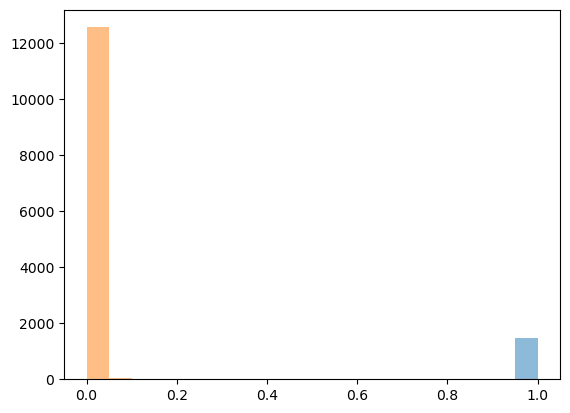

In [141]:
from matplotlib import pyplot as plt

plt.hist(predicted_probas[:,1][test_labels == 1], bins=20, alpha=0.5)
plt.hist(predicted_probas[:,1][test_labels == 0], bins=20, alpha=0.5)
plt.show()

In [145]:
import pickle

model = LGBMClassifier(verbose=-1, n_estimators=800)
model.fit(all_fingerprints, all_from_host_labels, sample_weight=((all_from_host_labels==1) + 0.5))

with open('filtering_model.pkl', 'wb') as output_file:
    pickle.dump(model, output_file)

In [126]:
np.percentile(predicted_probas[:,1][test_labels == 1], 0.5)

np.float64(0.0010057121176665692)